예제 2. Grid Search로 HyperParameter 튜닝하기
==============================

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
cancer = load_breast_cancer()

In [ ]:
# DataFrame으로 만들기
x_data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y_data = pd.DataFrame(cancer.target)

x_data, x_test, y_data, y_test =  train_test_split(x_data, y_data, test_size=0.1, shuffle=False)
x_train, x_val, y_train, y_val =  train_test_split(x_data, y_data, test_size=0.1, shuffle=True, stratify = y_data, random_state=34)

In [ ]:
from sklearn.model_selection import GridSearchCV

cv_params = {
    'max_depth' : np.arange(1, 6, 1),
    'learning_rate':np.arange(0.05, 0.6, 0.05),
    'n_estimators':np.arange(50,300,50)
}

grid_model = GridSearchCV(XGBClassifier(),
                                cv_params,
                                scoring = 'precision',
                                cv =5,
                                n_jobs = 5)

grid_model.fit(x_train,y_train)
print(grid_model.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [ ]:
model = XGBClassifier(max_depth=5, n_estimators=250, learning_rate =  0.1, gpu_id = 0)
model.fit(x_train,y_train)

XGBClassifier(gpu_id=0, max_depth=5, n_estimators=250)

Validation Accuracy: 94.23%
Precision : 0.938
Recall : 0.968


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


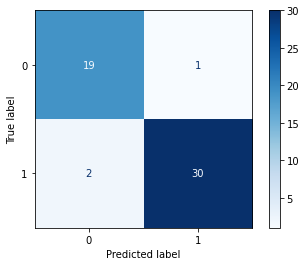

In [ ]:
plot_confusion_matrix(model, x_val, y_val, cmap = plt.cm.Blues)  

y_pred = model.predict(x_val)
predictions = [np.round(value) for value in y_pred]
accuracy = accuracy_score(y_val, predictions)

cm = confusion_matrix(predictions, y_val)
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

print('Validation Accuracy: %.2f%%' % (accuracy * 100.0))
print('Precision : {:.3f}'.format(tp / (tp + fp)))
print('Recall : {:.3f}'.format(tp / (tp + fn)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Accuracy: 100.00%
Precision : 1.000
Recall : 1.000


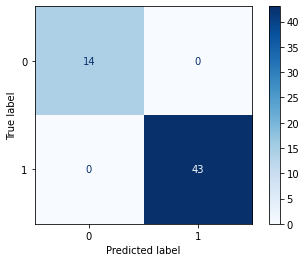

In [ ]:
plot_confusion_matrix(model, x_test, y_test, cmap = plt.cm.Blues)  

y_pred = model.predict(x_test)
predictions = [np.round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)


cm = confusion_matrix(predictions, y_test)
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

print('Test Accuracy: %.2f%%' % (accuracy * 100.0))
print('Precision : {:.3f}'.format(tp / (tp + fp)))
print('Recall : {:.3f}'.format(tp / (tp + fn)))